# 📊 K-Means Clustering pada Dataset Iris

## Apa Itu K-Means Clustering?

**K-Means Clustering** adalah algoritma unsupervised learning yang digunakan untuk membagi data ke dalam beberapa kelompok (klaster) berdasarkan kemiripan fitur. Tujuan utama dari K-Means adalah mempartisi data menjadi *k* klaster sedemikian rupa sehingga setiap data berada pada klaster dengan centroid (titik pusat) terdekat.

### Cara Kerja K-Means:
1. Tentukan jumlah klaster (*k*).
2. Inisialisasi centroid secara acak.
3. Tetapkan setiap data ke centroid terdekat.
4. Hitung ulang posisi centroid berdasarkan rata-rata anggota klaster.
5. Ulangi langkah 3–4 hingga centroid tidak berubah signifikan (konvergen).

---

## Alasan Memilih 2–4 Klaster

Pada eksperimen ini, dilakukan percobaan dengan jumlah klaster sebanyak **2, 3, dan 4** untuk menemukan jumlah klaster terbaik berdasarkan evaluasi kuantitatif. Alasan pemilihan jumlah klaster ini:

- Dataset Iris secara alami memiliki **3 kelas** (Setosa, Versicolor, Virginica), namun kita **menghapus label kelas**, sehingga kita tidak tahu jumlah klaster sebenarnya.
- Dengan mencoba nilai k = 2 hingga 4, kita dapat melihat bagaimana model membentuk klaster tanpa pengetahuan label, dan mengevaluasi hasilnya menggunakan **metrik evaluasi** seperti **Silhouette Score** dan **SSE**.
- Jika tidak ada informasi label, pendekatan umum adalah mencoba beberapa nilai *k* dan memilih nilai terbaik berdasarkan metrik evaluasi.

---

## Apa Itu Silhouette Score?

**Silhouette Score** adalah metrik yang digunakan untuk mengukur kualitas klastering.

### Interpretasi:
- **Mendekati 1** → data sangat cocok dengan klasternya.
- **Mendekati 0** → data berada di batas antara dua klaster.
- **Negatif** → data mungkin salah penempatan klaster.

### Rumus:
$$
s = \frac{b - a}{\max(a, b)}
$$

Dimana:
- \( a \) = rata-rata jarak data ke semua titik dalam klasternya (intra-cluster distance)
- \( b \) = rata-rata jarak data ke titik dalam klaster terdekat lain (nearest-cluster distance)

---

## Apa Itu SSE (Sum of Squared Errors)?

**SSE** atau **inertia** adalah total jarak kuadrat dari masing-masing data ke centroid klasternya.

### Tujuan:
Menunjukkan seberapa rapat data dalam tiap klaster. Semakin kecil nilai SSE, semakin baik penyebaran klaster (tapi terlalu kecil juga bisa overfitting).

### Rumus:
$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

Dimana:
- $( C_i \)$ = klaster ke-i
- $( \mu_i \)$ = centroid klaster ke-i
- $( ||x - \mu_i||^2 \)$ = kuadrat jarak Euclidean antara titik ke centroid

---

## Tujuan Evaluasi

Dengan membandingkan **Silhouette Score** dan **SSE** untuk masing-masing nilai *k*, kita bisa menentukan:
- Jumlah klaster yang secara alami paling tepat untuk data tanpa label.
- Keseimbangan antara ketepatan klaster (silhouette tinggi) dan kepadatan klaster (SSE rendah).

---



In [5]:
from google.colab import files
uploaded = files.upload()


Saving iris-mysql.csv to iris-mysql.csv


In [6]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('iris-mysql.csv')

# Tampilkan 5 baris awal
df.head()


,id,Class,petal length,petal width
0,1,Iris-setosa,1.4,0.2
1,2,Iris-setosa,1.4,0.2
2,3,Iris-setosa,1.3,0.2
3,4,Iris-setosa,1.5,0.2
4,5,Iris-setosa,1.4,0.2


In [8]:
# Drop kolom class
df_no_label = df.drop(columns=['Class'])  # atau ganti dengan nama kolom yang sesuai


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [10]:
sse = []
silhouette = []
K = [2, 3, 4]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_no_label)

    # SSE (Sum of Squared Errors)
    sse.append(kmeans.inertia_)

    # Silhouette Score
    score = silhouette_score(df_no_label, kmeans.labels_)
    silhouette.append(score)

# Tampilkan hasil
for i, k in enumerate(K):
    print(f"Cluster: {k} | SSE: {sse[i]:.2f} | Silhouette Score: {silhouette[i]:.4f}")


Cluster: 2 | SSE: 70527.29 | Silhouette Score: 0.6210
Cluster: 3 | SSE: 31307.72 | Silhouette Score: 0.5824
Cluster: 4 | SSE: 17748.15 | Silhouette Score: 0.5580


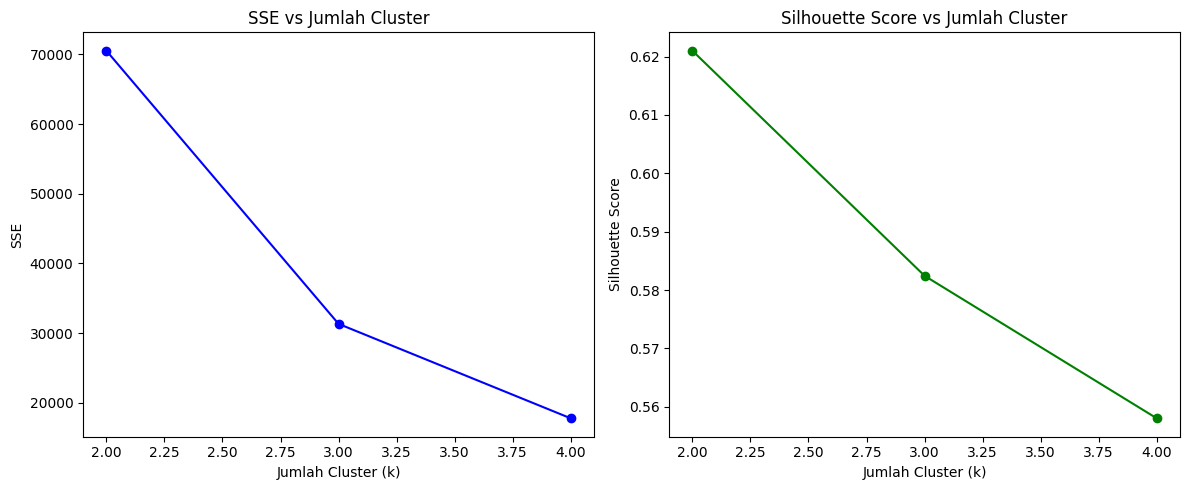

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, sse, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE')
plt.title('SSE vs Jumlah Cluster')

plt.subplot(1,2,2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Jumlah Cluster')

plt.tight_layout()
plt.show()


## 📈 Analisis Hasil K-Means Clustering

Berikut adalah hasil evaluasi untuk jumlah klaster dari 2 hingga 4:

| Jumlah Klaster (k) | SSE        | Silhouette Score |
|--------------------|------------|------------------|
| 2                  | 70527.29   | **0.6210**       |
| 3                  | 31307.72   | 0.5824           |
| 4                  | **17748.15** | 0.5580         |

### k = 3 Adalah Pilihan Terbaik?

- **SSE** menurun drastis dari k=2 ke k=3 (dari ~70.5k ke ~31.3k), menunjukkan bahwa data menjadi jauh lebih rapat dan terkelompok lebih baik.
- Dari k=3 ke k=4, penurunan SSE masih ada (menjadi ~17.7k), **tapi tidak sebesar sebelumnya** — ini menunjukkan **titik pelambatan penurunan SSE** (*elbow point*), yang merupakan indikasi jumlah klaster yang ideal.
- **Silhouette Score** tertinggi memang pada k=2, namun nilai ini bisa menyesatkan karena hanya ada 2 kelompok, dan Iris sebenarnya mengandung 3 jenis bunga. Skor 0.5824 pada k=3 masih cukup tinggi dan stabil.
- K=4 menghasilkan SSE yang rendah, tapi Silhouette Score terendah, yang berarti pemisahan antar klaster mulai tidak jelas (klaster saling tumpang tindih).

### Kesimpulan:
- K=3 memberikan keseimbangan terbaik antara **kompaknya klaster (SSE rendah)** dan **pemisahan yang jelas (Silhouette Score memadai)**.
- Ini sejalan dengan struktur alami dataset Iris yang memang memiliki **3 spesies** berbeda, meskipun label dihapus dalam analisis ini.

Dengan demikian, **k=3 adalah jumlah klaster terbaik** untuk dataset Iris pada eksperimen K-Means ini.
